# Introduction to Working with Text in Python


 By: Dr. Eric Godat and Dr. Rob Kalescky
 
 Acknowledgements: Garrett Moore, Jaymie Ruddock

 Adapted from: [Ultimate Guide to deal with Text Data (Using Python)](https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/)
 
 Natural Language Toolkit: [Documentation](http://www.nltk.org/)
 
 Reference Text: [Natural Language Processing with Python](http://www.nltk.org/book/)
 

*This tutorial is designed to follow Introduction to Python. If you are not comfortable with basic python programming, consider checking out that lesson first.*

## Setup

These are the basic libraries we will use in for data manipulation (pandas) and math functions (numpy). We will add more libraries as we need them.

As a best practice, it is a good idea to load all your libraries in a single cell at the top of a notebook, however for the purposes of this tutorial we will load them as we go.

In [1]:
import pandas as pd
import numpy as np

## EDGAR Database

Here is the [homepage](https://www.sec.gov/edgar.shtml) for the Securities and Exchange Commission's EDGAR database. If you are having trouble finding a specific company, try their [full text search](https://www.sec.gov/edgar/search/#).

Usage documentation for the Python package can be found [here](https://pypi.org/project/edgar/).

Import the EDGAR python package and define a function that pulls 10-K filings for our companies

In [2]:
from edgar import Company, TXTML

In [3]:
def get_edgar(ll, n):
    filinglist = []
    for el in ll:
        company = Company(el[0], el[2])
        tree = company.get_all_filings(filing_type = "10-K")
        docs = Company.get_documents(tree, no_of_documents=n, as_documents=True)
        texts = Company.get_documents(tree, no_of_documents=n, as_documents=False)
        if n<2:
            docs=[docs]
            texts=[texts]
        for i in range(n):
            date = docs[i].content['Filing Date']
            text = TXTML.parse_full_10K(texts[i])
            filinglist.append([el[0],el[1],el[2],date,text])
    df = pd.DataFrame(filinglist, columns=['Company','Ticker','CIK','Date','Text'])
    return df

Our list of companies: \[Name, Ticker symbol, CIK\]

In [4]:
companies = [
['Alphabet Inc.','(GOOG, GOOGL)','0001652044'],
['AMAZON COM INC','(AMZN)','0001018724'],
['AMERISOURCEBERGEN CORP','(ABC)','0001140859'],
['Apple Inc.','(AAPL)','0000320193'],
['AT&T INC.','(T, TBC, TBB, T-PC, T-PA)','0000732717'],
['BANK OF AMERICA CORP','(BAC, MER-PK, BML-PL, BML-PJ, BML-PH, BML-PG, BAC-PM, BAC-PL, BAC-PK, BAC-PE, BAC-PC, BAC-PB, BAC-PA)','0000070858'],
['BERKSHIRE HATHAWAY INC','(BRK-B, BRK-A)','0001067983'],
['CARDINAL HEALTH INC','(CAH)','0000721371'],
['CHEVRON CORP','(CVX)','0000093410'],
['COSTCO WHOLESALE CORP','(COST)','0000909832'],
['CVS HEALTH Corp','(CVS)','0000064803'],
['EXXON MOBIL CORP','(XOM)','0000034088'],
['Facebook Inc','(FB)','0001326801'],
['FORD MOTOR CO','(F, F-PC, F-PB)','0000037996'],
['General Motors Co','(GM)','0001467858'],
['JPMORGAN CHASE & CO','(JPM, AMJ, PPLN, JPM-PJ, JPM-PH, JPM-PG, JPM-PD, JPM-PC)','0000019617'],
['MCKESSON CORP','(MCK)','0000927653'],
['MICROSOFT CORP','(MSFT)','0000789019'],
['UNITEDHEALTH GROUP INC','(UNH)','0000731766'],
['Walmart Inc.','(WMT)','0000104169'],
['GameStop Corp.','(GME)','0001326380'],
['STARBUCKS CORP','(SBUX)','0000829224']
]


Simple Test: Most Recent 10K filing

In [5]:
edgarDF = pd.DataFrame(companies, columns=['Company','Ticker','CIK'])
edgarDF['MostRecent_10K']=edgarDF.apply(lambda row: TXTML.parse_full_10K(Company(row['Company'],row['CIK']).get_10K()) , axis=1)
edgarDF

,Company,Ticker,CIK,MostRecent_10K
0,Alphabet Inc.,"(GOOG, GOOGL)",0001652044,\n\n\n\n\ngoog-20201231FALSE2020FY0001652044P7...
1,AMAZON COM INC,(AMZN),0001018724,\n\n\n\n\namzn-20201231false2020FY0001018724P3...
2,AMERISOURCEBERGEN CORP,(ABC),0001140859,\n\n\n\n\nabc-2020093000011408599/302020FYfals...
3,Apple Inc.,(AAPL),0000320193,\n\n\n\n\naapl-20200926truetruetruetruetruetru...
4,AT&T INC.,"(T, TBC, TBB, T-PC, T-PA)",0000732717,\n\n\n\n\nt-20201231false2020FY00007327174012u...
5,BANK OF AMERICA CORP,"(BAC, MER-PK, BML-PL, BML-PJ, BML-PH, BML-PG, ...",0000070858,\n\n\n\n\nbac-2020123100000708582020FYFALSEus-...
6,BERKSHIRE HATHAWAY INC,"(BRK-B, BRK-A)",0001067983,\n\n\n\n\n\n\n\n\n\n\n\nbrka-10k_20201231.htm\...
7,CARDINAL HEALTH INC,(CAH),0000721371,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...
8,CHEVRON CORP,(CVX),0000093410,\n\n\n\n\ncvx-202012310000093410false2020FYRef...
9,COSTCO WHOLESALE CORP,(COST),0000909832,"\n\n\n\n\ncost-2020083010-KFALSEAugust 30, 202..."


#### Last 3 10Ks with Filing Dates

In [6]:
data = get_edgar(companies,3)

In [7]:
data

,Company,Ticker,CIK,Date,Text
0,Alphabet Inc.,"(GOOG, GOOGL)",0001652044,2021-02-03,\n\n\n\n\ngoog-20201231FALSE2020FY0001652044P7...
1,Alphabet Inc.,"(GOOG, GOOGL)",0001652044,2020-02-04,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...
2,Alphabet Inc.,"(GOOG, GOOGL)",0001652044,2019-02-06,\n\nAmendment No. 1 to Form 10-K\n\n \n\n \...
3,AMAZON COM INC,(AMZN),0001018724,2021-02-03,\n\n\n\n\namzn-20201231false2020FY0001018724P3...
4,AMAZON COM INC,(AMZN),0001018724,2020-01-31,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...
...,...,...,...,...,...
61,GameStop Corp.,(GME),0001326380,2019-04-02,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\nUN...
62,GameStop Corp.,(GME),0001326380,2018-04-02,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\nUN...
63,STARBUCKS CORP,(SBUX),0000829224,2020-11-12,\n\n\n\n\nsbux-20200927falseTRUE2020FY00008292...
64,STARBUCKS CORP,(SBUX),0000829224,2019-11-15,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...


## Counting Words and Characters

The first bit of analysis we might want to do is to count the number of words in one piece of data. To do this we will add a column called *wordcount* and write an operation that applies a function to every row of the column.

Unpacking this piece of code, *len(str(x).split(" ")*, tells us what is happening.

For the content of cell *x*, convert it to a string, *str()*, then split that string into pieces at each space, *split()*.

The result of that is a list of all the words in the text and then we can count the length of that list, *len()*.

In [8]:
data['wordcount'] = data['Text'].apply(lambda x: len(str(x).split(" ")))
data[['Text','wordcount']].head()

,Text,wordcount
0,\n\n\n\n\ngoog-20201231FALSE2020FY0001652044P7...,47494
1,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...,44102
2,\n\nAmendment No. 1 to Form 10-K\n\n \n\n \...,1851
3,\n\n\n\n\namzn-20201231false2020FY0001018724P3...,34933
4,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...,36029


We can do something similar to count the number of characters in the data chunk, including spaces. If you wanted to exclude whitespaces, you could take the list we made above, join it together and count the length of the resulting string.

In [9]:
data = data.fillna("No Information Provided") #If some of our data is missing, this will replace the blank entries. This is only necessary in some cases


In [10]:
data['char_count'] = data['Text'].str.len() ## this also includes spaces, to do it without spaces, you could use something like this: "".join()
data[['Text','char_count']].head()

,Text,char_count
0,\n\n\n\n\ngoog-20201231FALSE2020FY0001652044P7...,375336
1,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...,364302
2,\n\nAmendment No. 1 to Form 10-K\n\n \n\n \...,14992
3,\n\n\n\n\namzn-20201231false2020FY0001018724P3...,274004
4,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...,305025


Now we want to calculate the average word length in the data.

Let's define a function that will do that for us:

In [11]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

We can now apply that function to all the data chunks and save that in a new column.

In [12]:
data['avg_word'] = data['Text'].apply(lambda x: avg_word(x))
data[['Text','avg_word']].head()

,Text,avg_word
0,\n\n\n\n\ngoog-20201231FALSE2020FY0001652044P7...,6.608880
1,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...,6.342718
2,\n\nAmendment No. 1 to Form 10-K\n\n \n\n \...,5.301764
3,\n\n\n\n\namzn-20201231false2020FY0001018724P3...,6.652604
4,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...,6.460655


We can then sort by the average word length.

In [13]:
data[['Text','avg_word']].sort_values(by='avg_word', ascending=True).head()

,Text,avg_word
2,\n\nAmendment No. 1 to Form 10-K\n\n \n\n \...,5.301764
35,\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n \n\n\n\n...,5.522009
53,\n\n\n\n\nmsft-10k_20180630.htm\n\n\n\n\n\n \n...,5.546546
52,\n\n\n\n\nmsft-10k_20190630.htm\n\n\n\n\n\n \n...,5.580830
38,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\n ...,5.622656


### Count Stopwords

Stopwords are words that are commonly used and do little to aid in the understanding of the content of a text. There is no universal list of stopwords and they vary on the style, time period and media from which your text came from.  Typically, people choose to remove stopwords from their data, as it adds extra clutter while the words themselves provide little to no insight as to the nature of the data.  For now, we are simply going to count them to get an idea of how many there are.

For this tutorial, we will use the standard list of stopwords provided by the Natural Language Toolkit python library.

In [14]:
#import nltk
#nltk.download('stopwords')

In [15]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

To count the number of stopwords in a chunk of data, we make a list of all the words in our data that are also in the stopword list. We can then just take the length of that list and store it in a new column

In [16]:
data['stopwords'] = data['Text'].apply(lambda x: len([x for x in x.split() if x in stop]))
data[['Text','stopwords','wordcount']].head()

,Text,stopwords,wordcount
0,\n\n\n\n\ngoog-20201231FALSE2020FY0001652044P7...,16641,47494
1,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...,15476,44102
2,\n\nAmendment No. 1 to Form 10-K\n\n \n\n \...,528,1851
3,\n\n\n\n\namzn-20201231false2020FY0001018724P3...,11625,34933
4,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...,12137,36029


### Other Ways to Count

There are other types of counting we might want to do. These might be more or less relevant depending on the test you are working with.

For completeness, we have put them here but we will skip over them in this tutorial

#### Counting Special Characters

This is really only useful for Twitter or other Internet texts but you could imagine wanting to count quotations or exclamations with something similar.

In [17]:
data['special_char'] = data['Text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
data[['Text','special_char']].head()

,Text,special_char
0,\n\n\n\n\ngoog-20201231FALSE2020FY0001652044P7...,0
1,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...,0
2,\n\nAmendment No. 1 to Form 10-K\n\n \n\n \...,0
3,\n\n\n\n\namzn-20201231false2020FY0001018724P3...,0
4,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...,0


#### Counting Numbers

This counts the number of numerical digits in a text, which for strict text may not be helpful, but mostly numerical data will make more use of this.

In [18]:
data['numerics'] = data['Text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data[['Text','numerics']].sort_values(by='numerics', ascending=False).head()

,Text,numerics
17,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...,6059
16,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...,5650
46,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...,5182
47,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...,5054
18,\n\n\n\n\n\n\n\n\n\n\n\nbrka-10k_20201231.htm\...,3023


#### Counting Uppercase

Counting uppercase words could give us an indication of how many sentences or proper nouns are in a text but this is likely too broad to be used to classify either on its own.

In [19]:
data['upper'] = data['Text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
data[['Text','upper']].head()

,Text,upper
0,\n\n\n\n\ngoog-20201231FALSE2020FY0001652044P7...,796
1,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...,797
2,\n\nAmendment No. 1 to Form 10-K\n\n \n\n \...,126
3,\n\n\n\n\namzn-20201231false2020FY0001018724P3...,439
4,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...,511


# Processing Text

A major component of doing analysis on text is the cleaning of the text prior to the analysis.

Though this process destroys some elements of the text (sentence structure, for example), it is often necessary in order to describe a text analytically. Depending on your choice of cleaning techniques, some elements might be preserved better than others if that is of importance to your analysis.

## Cleaning Up Words

This series of steps aims to clean up and standardize the text itself. This generally consists of removing common elements such as stopwords and punctuation but can be expanded to more detailed removals.

### Lowercase

Here we enforce that all of the text is lowercase. This makes it easier to match cases and sort words.

Notice we are assigning our modified column back to itself. This will save our modifications to our DataFrame

In [20]:
data['Text'] = data['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['Text'].head()

0    goog-20201231false2020fy0001652044p7yp3yp3yp1y...
1    document false--12-31fy20190001652044729000000...
2    amendment no. 1 to form 10-k united states sec...
3    amzn-20201231false2020fy0001018724p3yp1yp1yus-...
4    document 0.5p1yp1yp1y0029000000false--12-31fy2...
Name: Text, dtype: object

### Remove Punctuation

Here we remove all punctuation from the data. This allows us to focus on the words only as well as assist in matching.

In [21]:
data['Text'] = data['Text'].str.replace('[^\w\s]','', regex=True)
data['Text'].head()

0    goog20201231false2020fy0001652044p7yp3yp3yp1yp...
1    document false1231fy20190001652044729000000753...
2    amendment no 1 to form 10k united states secur...
3    amzn20201231false2020fy0001018724p3yp1yp1yusga...
4    document 05p1yp1yp1y0029000000false1231fy20190...
Name: Text, dtype: object

### Remove Numeric

Here we remove all the numeric digits from the data. We replace digits with blank spaces, then strip all excess spaces

In [40]:
data['Text'] = data['Text'].str.replace('[\d]',' ', regex=True)
data['Text'] = data['Text'].str.strip() 
data['Text'].head()

0    goog false fy p yp yp yp yp usgaapaccruedliabi...
1    document false fy p p yp p yp yp yp usgaapcomm...
2    amendment form k united state security exchang...
3    amzn false fy p yp yp yusgaapaccruedliabilitie...
4    document p yp yp false fy p yp yp yp p p usgaa...
Name: Text, dtype: object

### Remove Stopwords

Similar to what we did earlier when we counted stopwords, we now want to remove the stopwords. We will again use the NLTK list of stopwords but this time keep a list of words that do not appear in the list of stopwords.

In [23]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [24]:
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['Text'].head()

0    goog false fy p yp yp yp yp usgaapaccruedliabi...
1    document false fy p p yp p yp yp yp usgaapcomm...
2    amendment form k united states securities exch...
3    amzn false fy p yp yp yusgaapaccruedliabilitie...
4    document p yp yp false fy p yp yp yp p p usgaa...
Name: Text, dtype: object

### Remove Frequent Words

If we want to catch common words that might have slipped through the stopword removal, we can build out a list of the most common words remaining in our text.

Here we have built a list of the 10 most common words. Some of these words might actually be relevant to our analysis so it is important to be careful with this method.

In [25]:
freq = pd.Series(' '.join(data['Text']).split()).value_counts()[:10]
freq

financial    18531
net          15140
income       14286
million      13323
december     12791
may          12589
value        12416
company      12394
assets       12241
tax          11988
dtype: int64

We now follow the same procedure with which we removed stopwords to remove the most frequent words.

In [26]:
freq = list(freq.index)
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Text'].head()

0    goog false fy p yp yp yp yp usgaapaccruedliabi...
1    document false fy p p yp p yp yp yp usgaapcomm...
2    amendment form k united states securities exch...
3    amzn false fy p yp yp yusgaapaccruedliabilitie...
4    document p yp yp false fy p yp yp yp p p usgaa...
Name: Text, dtype: object

### Remove Rare Words

By analogy, we can remove the most rare words. Some of these are strange misspellings or [hapax legomenon](https://en.wikipedia.org/wiki/Hapax_legomenon) (one off words that don't appear anywhere else in the text).

In [27]:
freq = pd.Series(' '.join(data['Text']).split()).value_counts()[-10:]
freq

tvideomembertcommunicationsmember                                                       1
serviceson                                                                              1
reportingprinciples                                                                     1
storesno                                                                                1
consorcio                                                                               1
alternativecpriorperiod                                                                 1
usgaapotherexpensememberusgaapaccumulatedtranslationadjustmentmember                    1
mckfax_number                                                                           1
nowpending                                                                              1
srtmaximummemberusgaappensionplansdefinedbenefitmemberusgaapprivateequityfundsmember    1
dtype: int64

Again, removing words following the same process as the stopword removal.

In [28]:
freq = list(freq.index)
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Text'].head()

0    goog false fy p yp yp yp yp usgaapaccruedliabi...
1    document false fy p p yp p yp yp yp usgaapcomm...
2    amendment form k united states securities exch...
3    amzn false fy p yp yp yusgaapaccruedliabilitie...
4    document p yp yp false fy p yp yp yp p p usgaa...
Name: Text, dtype: object

### Correct Spelling

Misspellings can cause inaccuracies in text analysis. For example, "the" and "teh" are likely intended to be the same word and a reader might gloss over that typo, but a computer would view them as distinct.

To help address this we will leverage the [TextBlob package](https://textblob.readthedocs.io/en/dev/) to check the spelling.

Since this can be slow and often of questionable usefulness, we have limited the check to the first 5 rows of our DataFrame.

It is also worth keeping in mind that, much like autocorrect on your phone, the spellchecking here is not going to be perfectly accurate and could result in just as many errors as it fixes (especially if you are working on text from edited or published sources).

### Tokenization

Tokenization is the process of splitting up a block of text into a sequence of words or sentences.

For those familiar with R and the Tidyverse, this would be referred to as unnesting tokens

Here we show all the tokenized words from the first data chunk in our Dataframe.

In [29]:
#import nltk
#nltk.download('punkt')

In [30]:
from textblob import TextBlob

TextBlob(data['Text'][0]).words

WordList(['goog', 'false', 'fy', 'p', 'yp', 'yp', 'yp', 'yp', 'usgaapaccruedliabilitiescurrentusgaapaccruedliabilitiescurrent', 'usgaapcommonclassamember', 'googcapitalclasscmember', 'iso', 'usd', 'xbrlishares', 'usgaapcommonclassamember', 'usgaapcommonclassbmember', 'googcapitalclasscmember', 'iso', 'usdxbrlishares', 'usgaapcommonclassamember', 'usgaapcommonclassamember', 'usgaapcommonclassbmember', 'usgaapcommonclassbmember', 'googcapitalclasscmember', 'googcapitalclasscmember', 'usgaapcommonstockincludingadditionalpaidincapitalmember', 'usgaapaccumulatedothercomprehensiveincomemember', 'usgaapretainedearningsmember', 'srtcumulativeeffectperiodofadoptionadjustmentmemberusgaapaccumulatedothercomprehensiveincomemember', 'srtcumulativeeffectperiodofadoptionadjustmentmemberusgaapretainedearningsmember', 'srtcumulativeeffectperiodofadoptionadjustmentmember', 'usgaapcommonstockincludingadditionalpaidincapitalmember', 'usgaapretainedearningsmember', 'usgaapaccumulatedothercomprehensiveincom

## Stemming

Stemming is the process of removing suffices, like "ed" or "ing".

We will use another standard NLTK package, PorterStemmer, to do the stemming.

In [31]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['Text'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    goog fals fy p yp yp yp yp usgaapaccruedliabil...
1    document fals fy p p yp p yp yp yp usgaapcommo...
2    amend form k unit state secur exchang commiss ...
3    amzn fals fy p yp yp yusgaapaccruedliabilities...
4    document p yp yp fals fy p yp yp yp p p usgaap...
Name: Text, dtype: object

As we can see "wonderful" became "wonder", which could help an analysis, but "deathbed" became "deathb" which is less helpful.

## Lemmatization

Lemmatization is often a more useful approach than stemming because it leverages an understanding of the word itself to convert the word back to its root word. However, this means lemmatization is less aggressive than stemming (probably a good thing).

In [32]:
#import nltk
#nltk.download('wordnet')

In [33]:
from textblob import Word
data['Text'] = data['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['Text'].head()

0    goog false fy p yp yp yp yp usgaapaccruedliabi...
1    document false fy p p yp p yp yp yp usgaapcomm...
2    amendment form k united state security exchang...
3    amzn false fy p yp yp yusgaapaccruedliabilitie...
4    document p yp yp false fy p yp yp yp p p usgaa...
Name: Text, dtype: object

## Visualizing Text

Now, we are going to make a word cloud based on our data set.

In [34]:
%config InlineBackend.figure_format ='retina'

In [35]:
import wordcloud

In [36]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
stop_words = set(stop) #set(STOPWORDS)
stop_words.update(["year"])

If you want to update the stopwords after you see the wordcloud, type them into the empty list above and remove the # sign.

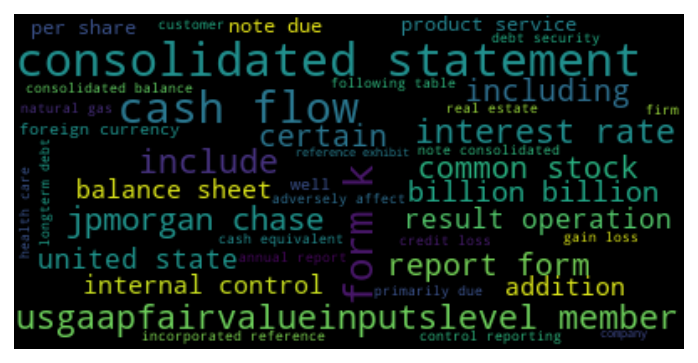

In [37]:
word = " ".join(data['Text'])
wordcloud = WordCloud(stopwords=stop_words, background_color="black").generate(word)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The above code creates a wordcloud based off all the words (except for stop words) in all of the stories. While this can be fun, it may not be as interesting as a wordcloud for a single story. Let's compare:

Company: Alphabet Inc. -- Date: 2021-02-03


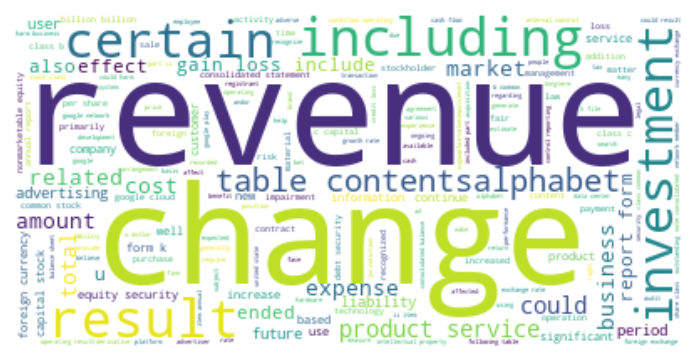

Company: AMAZON COM INC -- Date: 2021-02-03


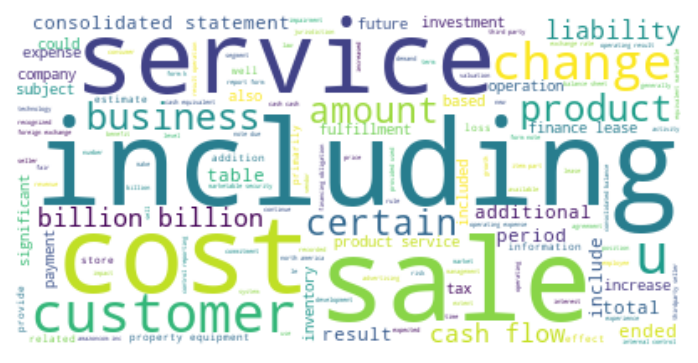

Company: AMERISOURCEBERGEN CORP -- Date: 2020-11-19


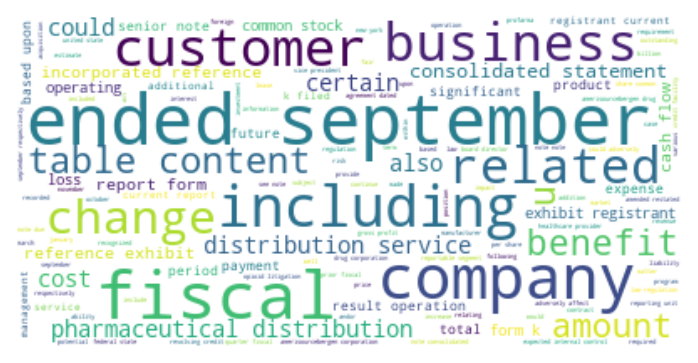

Company: Apple Inc. -- Date: 2020-10-30


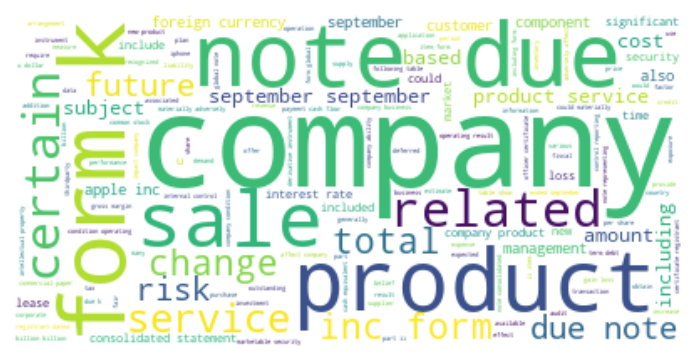

Company: AT&T INC. -- Date: 2021-02-25


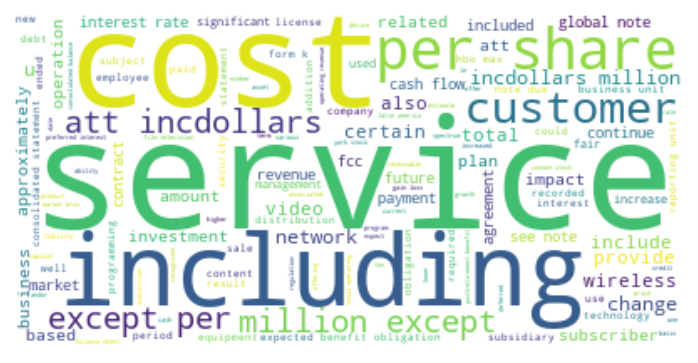

In [38]:
for i in range(0, 15, 3):
    print('Company: {} -- Date: {}'.format(data['Company'][i],data['Date'][i]))
    word = data['Text'][i]
    wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(word)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Wrapping Up

At this point we have a several options for cleaning and structuring our text data. We learned how to load data, do basic cleaning and start to analyze our data with some simple counting methods.

We suggest continuing to **Intermediate TextMining** to learn more advanced ways to study text analytically.